In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import csv
# %pip install networkx
from tqdm import tqdm
# %pip install tqdm
import networkx as nx

In [2]:

with open('../data/graph.pickle', 'rb') as handle:
    g = pickle.load(handle)

In [3]:
print("Number of nodes:", g.number_of_nodes())
print("Number of edges:", g.number_of_edges())
print("Density:", nx.density(g))

Number of nodes: 4867136
Number of edges: 23945602
Density: 1.010831775855996e-06


In [9]:
df_test = pd.read_csv('../data/test.csv', header= 0)

In [10]:
# In df_test add outdegree and indegree of from node and To node respectively
# and path length between them from -> To and To -> from
outdegree_from = []
outdegree_To = []
indegree_from = []
indegree_To = []
path_length = []
reversed_path_length = []
for index, row in tqdm(df_test.iterrows()):
    outdegree_from.append(g.out_degree(row['From']))
    outdegree_To.append(g.out_degree(row['To']))
    indegree_from.append(g.in_degree(row['From']))
    indegree_To.append(g.in_degree(row['To']))
    try:
        path_length.append(nx.shortest_path_length(g, row['From'], row['To']))
    except:
        path_length.append(-1)
    try:
        reversed_path_length.append(nx.shortest_path_length(g, row['To'], row['From']))
    except:
        reversed_path_length.append(-1)




2000it [00:06, 301.37it/s]


In [11]:
# save the dataframe
df_test['outdegree_from'] = outdegree_from
df_test['outdegree_To'] = outdegree_To
df_test['indegree_from'] = indegree_from
df_test['indegree_To'] = indegree_To
df_test['path_length'] = path_length
df_test['reversed_path_length'] = reversed_path_length
df_test.to_csv('../data/test_with_features.csv', index=False)

In [12]:
df_test.describe()

,Id,From,To,outdegree_from,outdegree_To,indegree_from,indegree_To,path_length,reversed_path_length
count,2000.000000,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2.489590e+06,2.419671e+06,1692.396000,1121.662500,121.129500,141.367000,2.336000,-0.523000
std,577.494589,1.392853e+06,1.371704e+06,7418.221914,18126.071634,214.672776,360.701365,0.482929,1.121205
min,1.000000,4.484000e+03,6.780000e+03,100.000000,0.000000,1.000000,9.000000,2.000000,-1.000000
25%,500.750000,1.284506e+06,1.257220e+06,177.000000,0.000000,28.000000,17.000000,2.000000,-1.000000
50%,1000.500000,2.528377e+06,2.413354e+06,341.000000,0.000000,60.000000,33.000000,2.000000,-1.000000
75%,1500.250000,3.721275e+06,3.573870e+06,860.750000,0.000000,128.000000,93.000000,3.000000,-1.000000
max,2000.000000,4.864100e+06,4.863480e+06,118717.000000,761793.000000,4636.000000,4840.000000,4.000000,5.000000


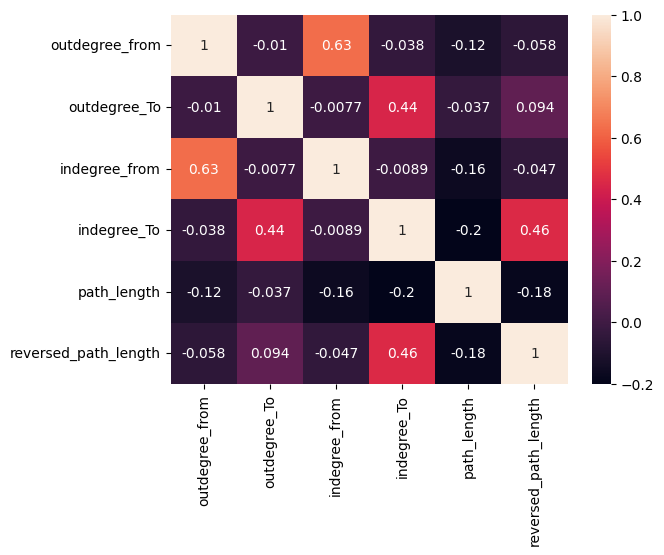

In [18]:
# draw corelation matrix
import seaborn as sns
sns.heatmap(df_test.drop(['Id','From','To'],axis=1).corr(), annot=True)
plt.show()

In [24]:
# draw analysis of each feature
print('outdegree_from')
df_test['outdegree_from'].hist()
plt.bar()
plt.show()
print('outdegree_To')
df_test['outdegree_To'].hist()
plt.show()
print('indegree_from')
df_test['indegree_from'].hist()
plt.show()
print('indegree_To')
df_test['indegree_To'].hist()
plt.show()
print('path_length')
df_test['path_length'].hist()
plt.show()
print('reversed_path_length')
df_test['reversed_path_length'].hist()
plt.show()


outdegree_from


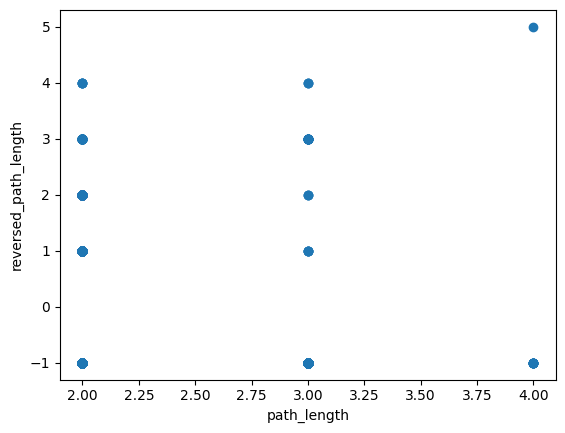

In [15]:
# plot reverse path length vs path length
plt.scatter(df_test['path_length'], df_test['reversed_path_length'])
plt.xlabel('path_length')
plt.ylabel('reversed_path_length')
plt.show()